# `BUILDING A ML MODEL TO PREDICT CUSTOMER CHURN` 
#### Using the CRISP-DM framework

## `Business Understanding`

#### Goal/Description
To create a machine learning model to predict the likelihood of retaining a customer

#### `Null Hypothesis`
There is no relationship between a tech savy customer and the customer retention

#### `Alternate Hypothesis`
There is a relationship between a tech savy customer and the customer retention

#### `Probing Questions`
- Do TV streaming customers have a higher monthly charge?
- What is the effect of online security and protection on customer retention?
- What is the relationship between customer age and the type of contract used?
- Do customers with dependents have more internet security?

## Data Understanding

#### Data Source
The data was sourced from a Telecommunication company and divided into three (3) parts :
- 3000 rows as the training data
- 2000 rows as the evaluation data 
- 2000 rows as the test data 

#### Data Exploration

In [228]:
#Libraries imported
import sqlalchemy as sa
import pyodbc  
from dotenv import dotenv_values 
import pandas as pd
from scipy import stats 
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import collections

from sklearn.metrics import *
from sklearn.model_selection import * 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [229]:
#Access protocols for the SQL Database
env_variables= dotenv_values('logins.env')
database= env_variables.get('database')
server = env_variables.get('server')
username = env_variables.get('username')
password = env_variables.get('password')

Python-dotenv could not parse statement starting at line 5


In [230]:
#Creation of Connection to Database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
connection = pyodbc.connect(connection_string)

In [231]:
#Querying SQL Database and reading the table into a dataframe
query = "SELECT * FROM LP2_Telco_churn_first_3000"

df= pd.read_sql(query, connection)
df.info()

C:\Users\chrap\AppData\Local\Temp\ipykernel_40576\3770348297.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, connection)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [232]:
# Describing the Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### OBSERVATIONS
- The dataset has a good gender balance of 51% of male and the rest being females.
- 84% of the customers are young which is expected as the younger generation are more aligned to streaming services.
- 80% are single individuals with no families.
- 

In [233]:
# Checking the Null value
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [234]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [235]:
#Dropping Empty rows
df = df.dropna(subset=['OnlineSecurity','OnlineBackup','DeviceProtection'],axis=0)


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2349 non-null   object 
 1   gender            2349 non-null   object 
 2   SeniorCitizen     2349 non-null   bool   
 3   Partner           2349 non-null   bool   
 4   Dependents        2349 non-null   bool   
 5   tenure            2349 non-null   int64  
 6   PhoneService      2349 non-null   bool   
 7   MultipleLines     2080 non-null   object 
 8   InternetService   2349 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          2349 non-null   object 
 16  PaperlessBilling  2349 non-null   bool   
 17  

In [237]:
#finding duplicates
duplicate = df[df.duplicated()]
duplicate.shape

(0, 21)

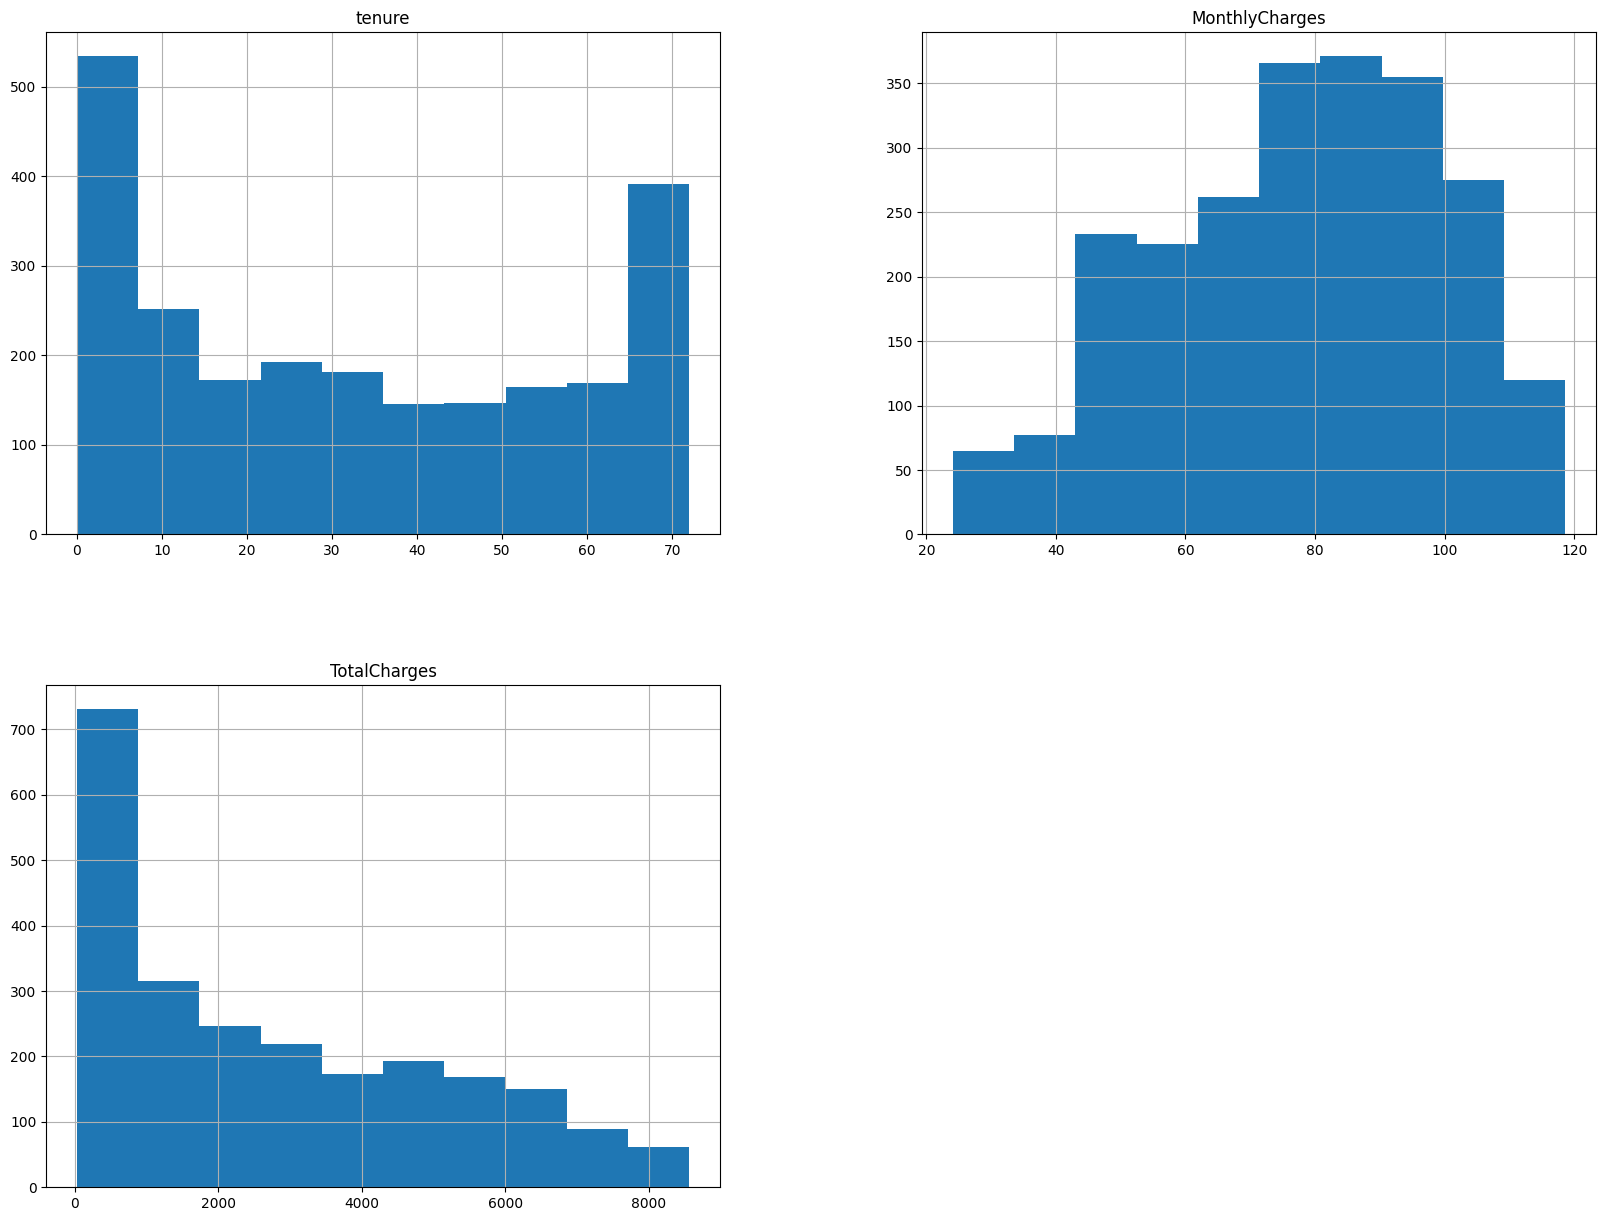

In [238]:
# Distribution of the variables
df.hist(figsize=(20, 15))
plt.show()

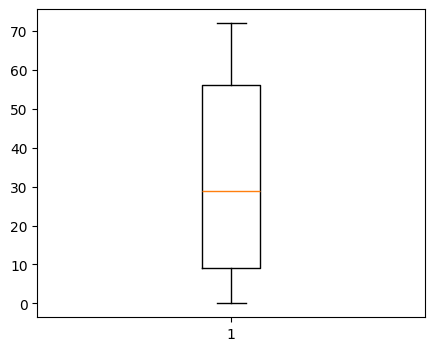

In [239]:
fig = plt.figure(figsize =(5, 4))
 
# Creating plot
plt.boxplot(df.tenure)
plt.show()

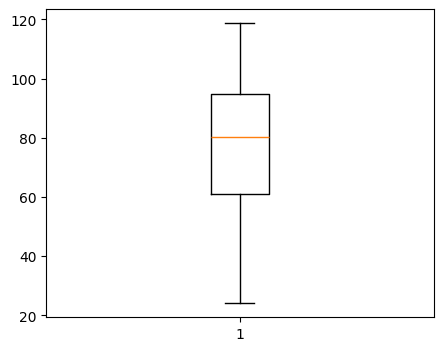

In [240]:
fig = plt.figure(figsize =(5, 4))
 
# Creating plot
plt.boxplot(df.MonthlyCharges)
plt.show()

fig = plt.figure(figsize =(5, 4))
 
# Creating plot
plt.bar(df.TotalCharges)
plt.show()

In [241]:
#Do TV streaming customers have a higher monthly charge?
streamers = df.groupby('StreamingTV')['MonthlyCharges'].sum()
streamers

StreamingTV
False     78696.899982
True     103558.500027
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='OnlineSecurity,DeviceProtection'>

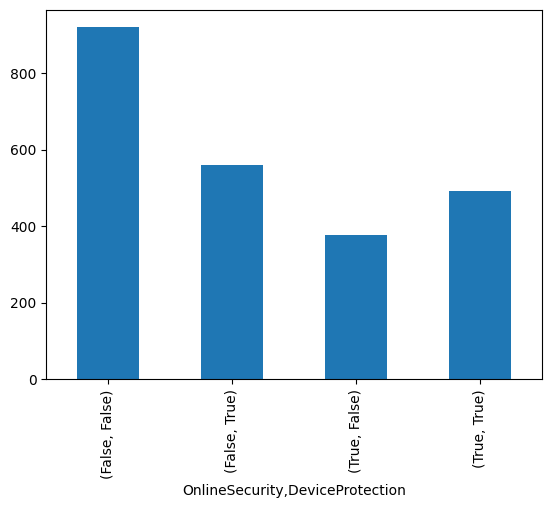

In [242]:
#What is the effect of online security and protection on customer retention?
cust_retention = df.groupby(['OnlineSecurity','DeviceProtection'])['Churn'].count()
cust_retention.plot(kind='bar')

<Axes: xlabel='Contract'>

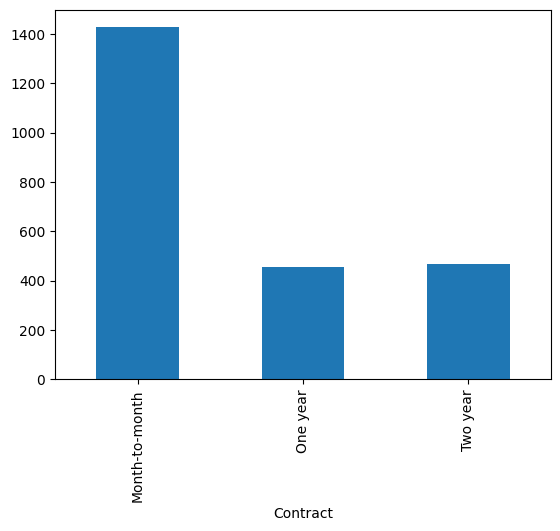

In [243]:
#What is the relationship between customer age and the type of contract used?
cust_contract = df.groupby('Contract')['SeniorCitizen'].count()
cust_contract.plot(kind='bar')

OnlineSecurity
False    1478
True      871
Name: Dependents, dtype: int64

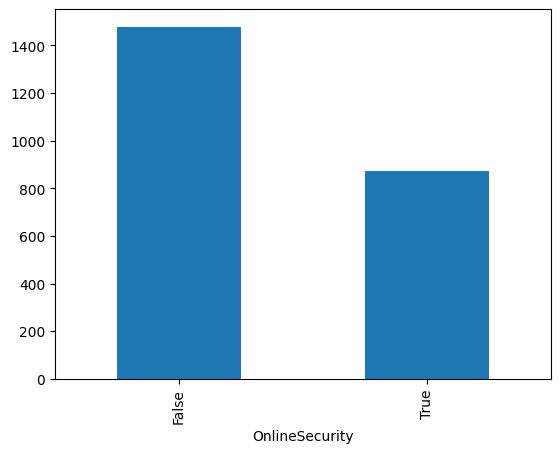

In [244]:
#Do customers with dependents have more internet security?
cust_contract = df.groupby('OnlineSecurity')['Dependents'].count()
cust_contract.plot(kind='bar')
cust_contract

In [245]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [246]:
#Checking Normality of the data 

def check_normality(data,name):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.20f" % p_value_normality)
    if p_value_normality <0.05:
        print(f"Reject null hypothesis >> The data for {name} is not normally distributed")
    else:
        print(f"Fail to reject null hypothesis >> The data for {name} is normally distributed")

In [247]:
#Hypothesis
#There is no relationship between a tech savy customer and the customer retention
##
#
###
###
df_tech= df.loc[df.OnlineSecurity & df.DeviceProtection]
online=df.loc[df.OnlineSecurity]
device= df.loc[df.DeviceProtection]


device

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
12,8091-TTVAX,Male,False,True,False,58,True,True,Fiber optic,False,...,True,False,True,True,One year,False,Credit card (automatic),100.349998,5681.100098,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,4674-HGNUA,Male,False,True,True,71,True,True,DSL,True,...,True,True,True,True,Two year,False,Credit card (automatic),89.900002,6457.149902,False
2985,9786-IJYDL,Female,False,False,False,35,True,True,Fiber optic,True,...,True,True,True,True,Two year,True,Mailed check,113.199997,3914.050049,False
2988,6295-OSINB,Male,False,True,False,72,True,True,Fiber optic,True,...,True,False,True,True,Two year,True,Electronic check,109.650002,7880.250000,None
2991,2207-QPJED,Female,True,True,False,37,True,False,Fiber optic,False,...,True,True,True,False,Month-to-month,False,Electronic check,90.000000,3371.750000,False


In [248]:
check_normality(df_tech.TotalCharges,'Online Security and Device Protection')
check_normality(online.TotalCharges,'Online Security')
check_normality(device.TotalCharges,'Device Protection')

p value:1.00000000000000000000
Fail to reject null hypothesis >> The data for Online Security and Device Protection is normally distributed
p value:1.00000000000000000000
Fail to reject null hypothesis >> The data for Online Security is normally distributed
p value:1.00000000000000000000
Fail to reject null hypothesis >> The data for Device Protection is normally distributed


In [249]:
#Using the P-Levene to test the Hypothesis
stat, pvalue_levene= stats.levene(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges )

print("p value:%.10f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:nan
Fail to reject null hypothesis >> The variances of the samples are same.


#### Observation 
-Data is normally distributed
- Parametric test can be done

In [250]:
#ANOVA test

stat, p = kruskal(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges)
print('Statistics=%.3f, p=%.15f' % (stat, p))

if p > 0.05:
 print('All sample distributions are the same (fail to reject H0)')
else:
 print('One or more sample distributions are not equal distributions (reject null Hypothesis)')

Statistics=nan, p=nan
One or more sample distributions are not equal distributions (reject null Hypothesis)


#### Observation
No duplicates

## Data preparation
### Selecting columns of interest for ML model
There columns of interest for the model are 
Dependents
InternetService
OnlineSecurity
OnlineBackup
TechSupport
StreamingTV
TechSupport
MonthlyCharges

In [251]:
#Colunms of interest
cols=[
    'Dependents',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'TechSupport',
'StreamingTV',
'TechSupport',
'MonthlyCharges',
'Churn'
]

In [252]:
train_df=df[['Dependents','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','MonthlyCharges','Churn']]
train_df

,Dependents,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,MonthlyCharges,Churn
0,False,DSL,False,True,False,False,29.850000,False
1,False,DSL,True,False,False,False,56.950001,False
2,False,DSL,True,True,False,False,53.849998,True
3,False,DSL,True,False,True,False,42.299999,False
4,False,Fiber optic,False,False,False,False,70.699997,True
...,...,...,...,...,...,...,...,...
2994,False,DSL,True,True,True,False,38.599998,False
2995,False,DSL,False,False,False,False,25.250000,False
2996,False,DSL,True,False,False,False,60.599998,False
2997,False,Fiber optic,False,True,False,True,89.949997,True


In [253]:
#Getting the test csv data 
test_df = pd.read_csv("data\\LP2_Telco-churn-second-2000.csv",usecols=cols)

test_df

,Dependents,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,MonthlyCharges,Churn
0,No,DSL,No,No,Yes,No,49.50,No
1,No,DSL,No,No,Yes,No,55.00,Yes
2,Yes,DSL,Yes,No,No,No,43.95,No
3,Yes,Fiber optic,No,No,No,No,74.35,Yes
4,No,Fiber optic,No,Yes,Yes,Yes,111.15,No
...,...,...,...,...,...,...,...,...
2038,Yes,DSL,Yes,No,Yes,Yes,84.80,No
2039,Yes,Fiber optic,No,Yes,No,Yes,103.20,No
2040,Yes,DSL,Yes,No,No,No,29.60,No
2041,No,Fiber optic,No,No,No,No,74.40,Yes


In [254]:
### Handling missing values and categorical encoding
#### Creating a function t handle missing data as well


In [255]:
def categorical_boolean_mapping(dataframe):
    import collections
    #Go through all columns and find unique values
    mapping_list_1= ['No' ,'Yes' ,'No internet service']
    mapping_list_2= ['No' ,'Yes']
    for column in cols:
        unique_values=dataframe[column].unique()
    #If unique values are yes,no and no internet service and then then map to true and falso
        if collections.Counter(mapping_list_1) == collections.Counter(unique_values):
            print("The lists are identical")
            print(mapping_list_1)
            print(unique_values)
            dataframe[column]=dataframe[column].map({
                    'No': 'False',
                    'Yes': 'True',
                    'No internet service': 'False'
                })
        if collections.Counter(mapping_list_2) == collections.Counter(unique_values):
            print("The lists are identical")
            print(mapping_list_2)
            print(unique_values)
            dataframe[column]=dataframe[column].map({
                    'No': 'False',
                    'Yes': 'True'
                })
        else:
            print("The lists are not identical")
    #if true and false then maintain 
    #anything else maintain
    return dataframe    

test= categorical_boolean_mapping(test_df)


The lists are identical
['No', 'Yes']
['No' 'Yes']
The lists are not identical
The lists are identical
['No', 'Yes', 'No internet service']
['No' 'Yes' 'No internet service']
The lists are not identical
The lists are identical
['No', 'Yes', 'No internet service']
['No' 'Yes' 'No internet service']
The lists are not identical
The lists are identical
['No', 'Yes', 'No internet service']
['Yes' 'No' 'No internet service']
The lists are not identical
The lists are identical
['No', 'Yes', 'No internet service']
['No' 'Yes' 'No internet service']
The lists are not identical
The lists are not identical
The lists are not identical
The lists are identical
['No', 'Yes']
['No' 'Yes']


In [256]:
test_df=test

In [257]:
# Checking the Null value
test_df.isnull().sum()


Dependents         0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
TechSupport        0
StreamingTV        0
MonthlyCharges     0
Churn              0
dtype: int64

In [258]:
train_df.isnull().sum()

Dependents         0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
TechSupport        0
StreamingTV        0
MonthlyCharges     0
Churn              1
dtype: int64

### Handling Categorical Features

Most Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.


In [259]:
# Create a list of the categoricals variables
categoricals = [column for column in test_df.columns if test_df[column].dtype == "O"]
cat=[]
for name in categoricals:
    if name in ['Churn']:
        pass
    else:
        cat.append(name)
cat

['Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV']

In [260]:
train_df

,Dependents,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,MonthlyCharges,Churn
0,False,DSL,False,True,False,False,29.850000,False
1,False,DSL,True,False,False,False,56.950001,False
2,False,DSL,True,True,False,False,53.849998,True
3,False,DSL,True,False,True,False,42.299999,False
4,False,Fiber optic,False,False,False,False,70.699997,True
...,...,...,...,...,...,...,...,...
2994,False,DSL,True,True,True,False,38.599998,False
2995,False,DSL,False,False,False,False,25.250000,False
2996,False,DSL,True,False,False,False,60.599998,False
2997,False,Fiber optic,False,True,False,True,89.949997,True


In [261]:
def categorical_encoder(df,cat_list):
    encoder = OneHotEncoder(drop=None, sparse_output =False,handle_unknown='ignore')

    # Fitting the OneHotEncoder on the categorical columns
    encoder.fit(df[cat_list])

    # Transform the categorical columns using one-hot encoding
    encoded_categoricals = encoder.transform(df[cat_list)]

    # Create a DataFrame from the one-hot encoded features
    encoded_categoricals = pd.DataFrame(data=encoded_categoricals, columns=encoder.get_feature_names_out(cat_list))

    # Display the first few rows of the resulting DataFrame
    encoded_categoricals.head(2)

    # Add the encoded categoricals to the DataFrame and dropping the original columns
    new_encoded_df = df.join(encoded_categoricals) # add back encoded categoricals
    new_encoded_df.drop(columns=cat_list, inplace=True)  # remove original categoricals
    return new_encoded_df

,Dependents_False,Dependents_True,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_False,OnlineSecurity_True,OnlineBackup_False,OnlineBackup_True,TechSupport_False,TechSupport_True,StreamingTV_False,StreamingTV_True
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
###                        TRY TO USE PIPELINES

In [262]:
## Modeling

In [263]:
## Evaluation

### Data Understainding

Data Understanding typically involves the following steps:

- Determine what data is needed and collect the data if not available
- Explore data
- Verify data quality

In [264]:
# Distribution of the variables
data.hist(figsize=(20, 15))

NameError: name 'data' is not defined

### EDA 
#### Visualizing Characteristics of the Dataset

In [ ]:
monthly_charges=(data.groupby('PaymentMethod',sort=True)['TotalCharges'].sum())
fig=px.bar(monthly_charges,y='TotalCharges')#,color ='PaymentMethod',text='PaymentMethod',labels={'PaymentMethod':'Sum of charges(Lahks/1000)'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed